In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(1)
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline
%matplotlib widget 

In [56]:
df = pd.read_csv(r'C:\Users\vadla\OneDrive\Desktop\DataMining\assignment2.csv')


In [57]:
X = df[['X']]
y = df[['y']]

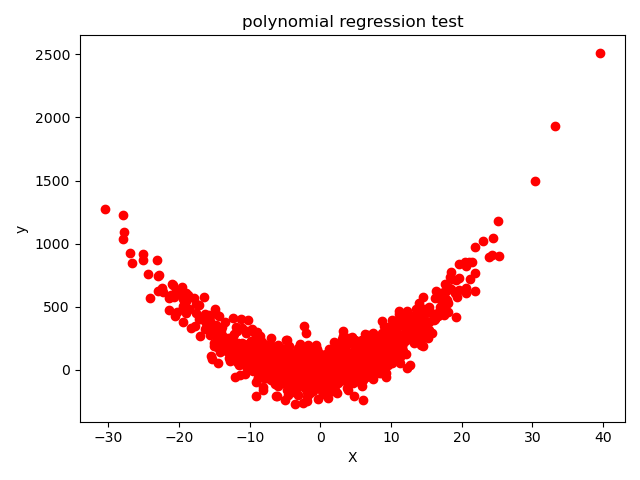

In [58]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("polynomial regression test")
plt.tight_layout()
plt.show()

In [59]:
lin_reg1=LinearRegression().fit(X,y)

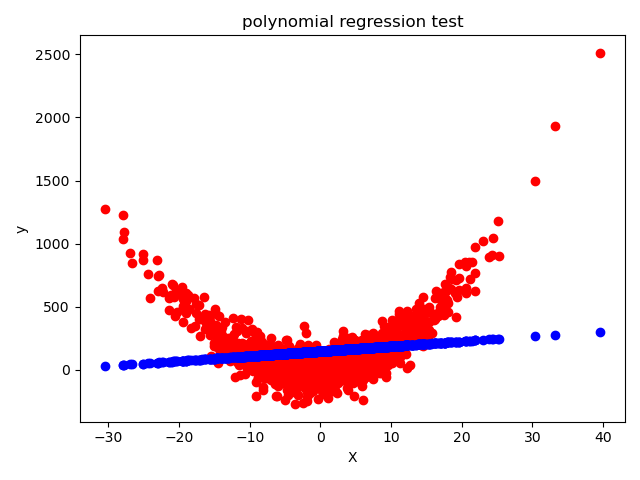

In [60]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("polynomial regression test")
plt.tight_layout()
plt.show()

In [61]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [62]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 148.1619469528557 + 3.889315352288554x
R^2: 0.023893162383578526


## Another model- 2nd order polynomial

In [63]:
X_poly=PolynomialFeatures(degree=2).fit_transform(X)

In [64]:
lin_reg2=LinearRegression().fit(X_poly,y)

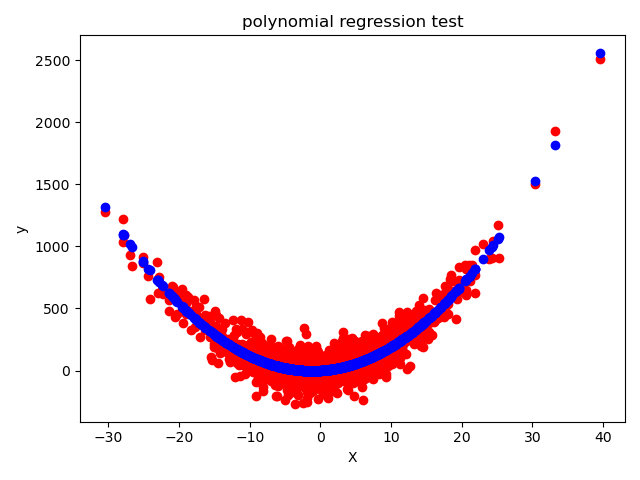

In [65]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg2.predict(X_poly),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("polynomial regression test")
plt.tight_layout()
plt.show()

In [66]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly, y):.2f}")

Y = -0.12 + 3.73x + 1.54x^2
R^2: 0.83


## Creation of Train and Test dataset

In [67]:
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.3,random_state=10)

In [68]:
polynomial=PolynomialFeatures(degree=2)

In [69]:
X_Train_p = polynomial.fit_transform(X_Train)

In [70]:
X_Test_p = polynomial.fit_transform(X_Test)

In [71]:
model=LinearRegression()

In [72]:
model.fit(X_Train_p,y_Train)

LinearRegression()

In [73]:
y_Test_p = model.predict(X_Test_p)

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_Test,y_Test_p)

10267.794699997985

In [75]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_Test,y_Test_p)

82.21412169574835

### To find co-efficients by comparing the results with non test/train split model

In [76]:
print(f"Y = {model.intercept_[0]:.2f} + { model.coef_[0][1]:.2f}x + {model.coef_[0][2]:.2f}x^2")
print(f"R^2: {model.score(X_Test_p, y_Test):.2f}")

Y = -1.37 + 3.62x + 1.56x^2
R^2: 0.87


### While comparing the train/test split model with the earlier model, I can see that the both models have almost identical coefficient values that are closer to the ones which were specified while creating the data, as can be seen from this comparison. Additionally, both models' r-square values, which are closer to 1, indicate that they have both performed relatively well.
